In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [81]:
data = pd.read_csv('PreseidentsData.csv')
print('The number of data points : ' , len(data))
data.head()

The number of data points :  4287


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [98]:
data.drop(columns=['notes'],inplace=True)
data.rename(columns={'party_detailed':'party'},inplace=True)

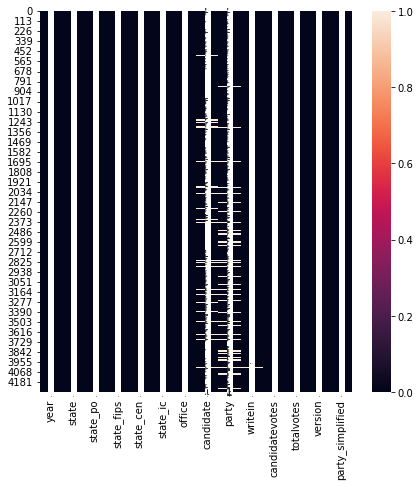

In [101]:
plt.figure(figsize=(7,7))
sb.heatmap(data.isnull(),cbar=True , annot=True)
plt.show()

In [99]:
print(data.isnull().sum())

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
candidate           287
party               456
writein               3
candidatevotes        0
totalvotes            0
version               0
party_simplified      0
dtype: int64


In [100]:
col_u = ['year' , 'party' , 'state']

for i in col_u:
    print('The number of unique values in ',i,'are :',len(data[i].unique()),' and unique values :',data[i].unique())

The number of unique values in  year are : 12  and unique values : [1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020]
The number of unique values in  party are : 173  and unique values : ['DEMOCRAT' 'REPUBLICAN' 'AMERICAN INDEPENDENT PARTY' 'PROHIBITION'
 'COMMUNIST PARTY USE' 'LIBERTARIAN' nan 'INDEPENDENT' 'SOCIALIST WORKERS'
 'AMERICAN' 'PEACE & FREEDOM' 'U.S. LABOR' 'NO PARTY AFFILIATION'
 'SOCIALIST LABOR' 'AMERICAN PARTY OF IOWA' 'SOCIALIST U.S.A.'
 'CONSERVATIVE' 'HUMAN RIGHTS' "MCCARTHY '76" "PEOPLE'S"
 'INTERNATIONAL DEVELOPMENT BANK' 'INDUSTRIAL GOVERNMENT PARTY'
 'SOCIALIST' 'LIBERAL PARTY' 'FREE LIBERTARIAN' 'LABOR'
 'CONSTITUTION PARTY' 'CONCERNED CITIZENS' 'STATESMAN' 'CITIZENS'
 'WORKERS WORLD' 'NATIONAL UNITY CAMPAIGN' 'ANDERSON COALITION'
 'NOMINATED BY PETITION' 'RESPECT FOR LIFE' 'RIGHT-TO-LIFE'
 'MIDDLE CLASS CANDIDATE' 'DOWN WITH LAWYERS' "NATURAL PEOPLE'S LEAGUE"
 'POPULIST' 'ALLIANCE' 'UNITED SOVEREIGN CITIZENS' 'WORKERS LEAGUE'
 'BIG DEAL PARTY' 'NATI

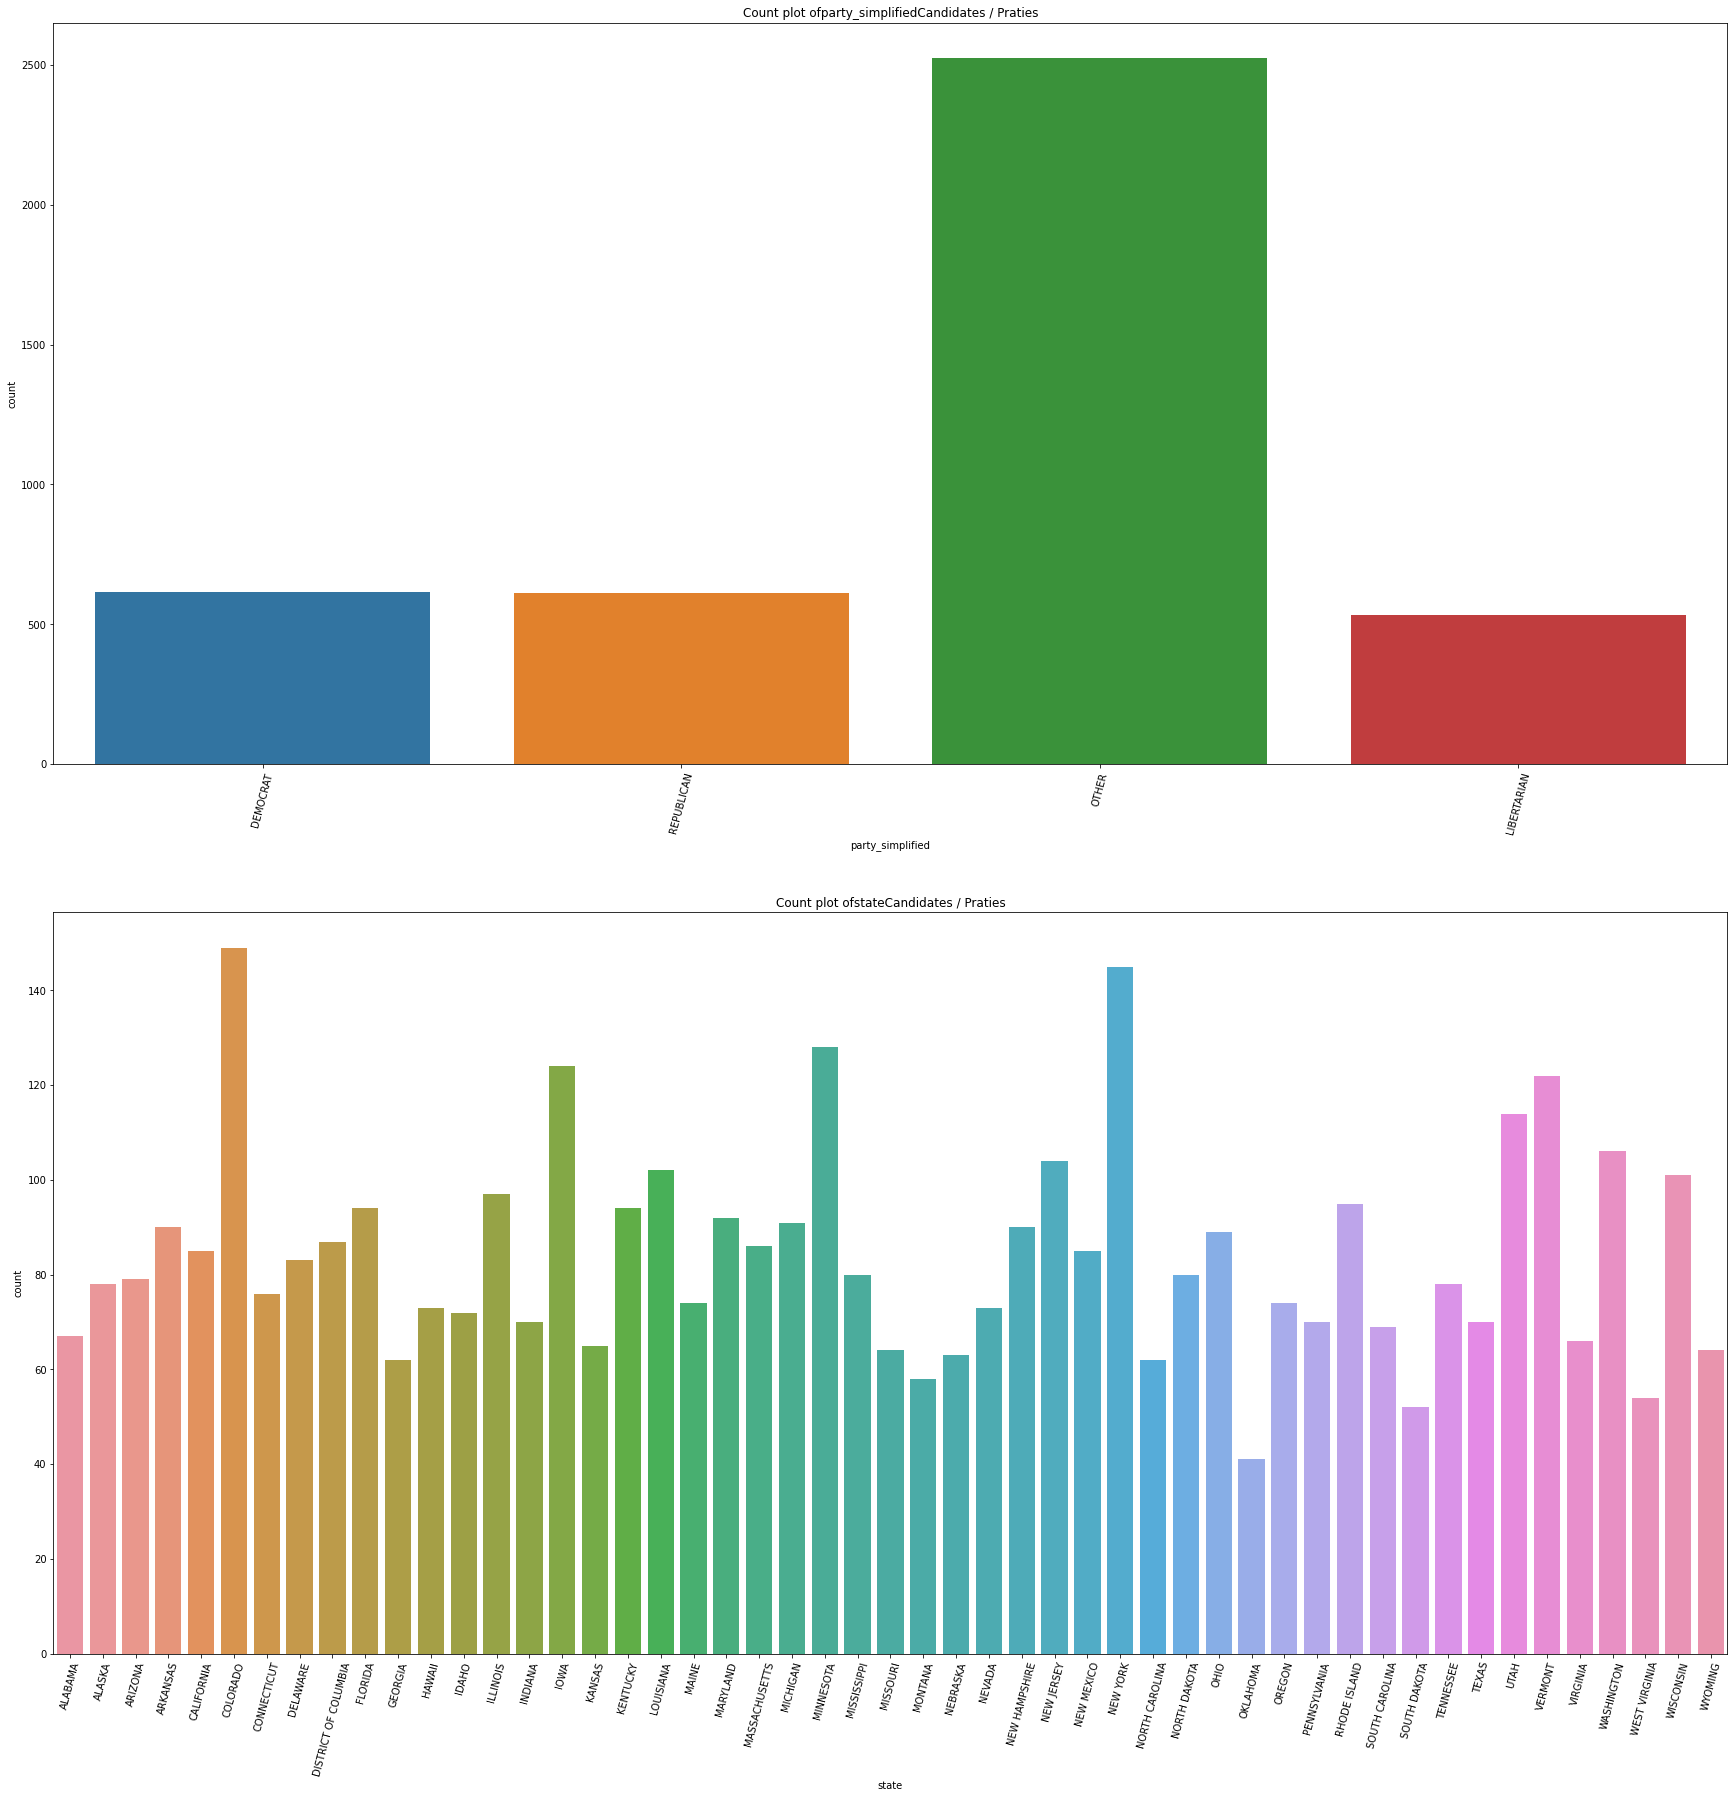

In [101]:
cols = ['party_simplified','state']
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[30,30])
for i in range(0,len(cols)):
    axes[i] = sb.countplot(x=cols[i],data=data,ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=75)
    axes[i].set_title('Count plot of'+cols[i]+'Candidates / Praties')

In [102]:
data.party_simplified.value_counts()

OTHER          2524
DEMOCRAT        615
REPUBLICAN      613
LIBERTARIAN     535
Name: party_simplified, dtype: int64

In [103]:
data.state.value_counts().head(10)

COLORADO      149
NEW YORK      145
MINNESOTA     128
IOWA          124
VERMONT       122
UTAH          114
WASHINGTON    106
NEW JERSEY    104
LOUISIANA     102
WISCONSIN     101
Name: state, dtype: int64

In [104]:
data.candidatevotes

0       659170
1       504070
2         9198
3         6669
4         1954
         ...  
4282      5768
4283      2208
4284      1739
4285       279
4286      1459
Name: candidatevotes, Length: 4287, dtype: int64

In [105]:
print('It can be seen that the Democrats are the most populars')
data[(data.candidatevotes >6000000)][['candidate','candidatevotes','party_simplified']]

It can be seen that the Democrats are the most populars


,candidate,candidatevotes,party_simplified
2432,"KERRY, JOHN",6745485,DEMOCRAT
2751,"OBAMA, BARACK H.",8274473,DEMOCRAT
3098,"OBAMA, BARACK H.",7854285,DEMOCRAT
3425,"CLINTON, HILLARY",8753788,DEMOCRAT
3773,"BIDEN, JOSEPH R. JR",11110250,DEMOCRAT
3774,"TRUMP, DONALD J.",6006429,REPUBLICAN


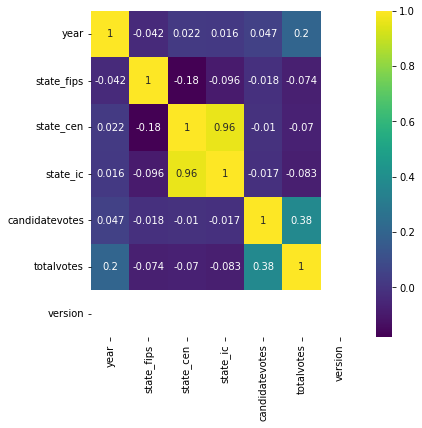

In [106]:
corr = data.corr()
plt.figure(figsize=(6,6))
sb.heatmap(corr,annot=True,cmap="viridis")
plt.show()

In [107]:
corr.sort_values(by='totalvotes',ascending=False).iloc[0].sort_values(ascending=False)

totalvotes        1.000000
candidatevotes    0.375120
year              0.200846
state_cen        -0.070217
state_fips       -0.074419
state_ic         -0.082694
version                NaN
Name: totalvotes, dtype: float64

In [108]:
data.skew()

C:\Users\kahza\AppData\Local\Temp/ipykernel_11312/1188251951.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



year             -0.048871
state_fips        0.029350
state_cen        -0.026119
state_ic         -0.080905
writein           2.471984
candidatevotes    4.506062
totalvotes        2.216780
version           0.000000
dtype: float64

In [109]:
print('consentation based on state until 1997')
parties_per_state = data.groupby('state')['party'].nunique().reset_index().sort_values('party',ascending = False)
fig = px.bar(parties_per_state, x='state', y='party', color='party', height=600)
fig.show()

consentation based on state until 1997


In [110]:
print('the most popular parties until 1997')
vote_per_party= data.groupby('party')['candidatevotes'].sum().reset_index().sort_values('candidatevotes',ascending = False)
fig = px.bar(vote_per_party.head(5), x='party', y='candidatevotes', color='candidatevotes', height=600)
fig.show()

the most popular parties until 1997


In [111]:
print('The most popular presidants in the past 40 years ')
vote_per_candidate= data.groupby('candidate')['candidatevotes'].sum().reset_index().sort_values('candidatevotes',ascending = False)
fig = px.bar(vote_per_candidate.head(25), x='candidate', y='candidatevotes', color='candidatevotes', height=600)
fig.show()

The most popular presidants in the past 40 years 


In [112]:
fig = px.histogram(data, x='state', y='totalvotes', color='year')
fig

In [113]:
fig = px.histogram(data, x='state', y='totalvotes', color='party_simplified')
fig

In [114]:
fig = px.histogram(data, x='state', y='totalvotes', color='year', facet_row='party_simplified', height=5000, hover_name='year')
fig

In [115]:
fig = px.choropleth(data, locations='state_po', color="totalvotes",
                           range_color=(0, 8000000),
                           locationmode = 'USA-states',  
                           scope="usa",
                           title='USA Presidential Vote Counts' 
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
vote_per_party= data.groupby('party')['candidatevotes'].sum().reset_index().sort_values('candidatevotes',ascending = False)

for index, row in vote_per_party.head(5).iterrows():
    party_name = row['party']
    title_head = 'USA Presidential Vote Counts - ' + party_name
    print(title_head)
    df_r = data.loc[data['party'] == party_name]
    fig = px.choropleth(df_r,
                        locations='state_po',
                        color="candidatevotes",
                        range_color=(0, 8000000),
                        locationmode = 'USA-states',
                        title=title_head,
                        scope="usa")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()


USA Presidential Vote Counts - DEMOCRAT


USA Presidential Vote Counts - REPUBLICAN


USA Presidential Vote Counts - INDEPENDENT


USA Presidential Vote Counts - LIBERTARIAN


USA Presidential Vote Counts - REFORM PARTY
